In [3]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

import os, math
import numpy as np
import pandas as pd
import seaborn as sns
import helpers

%matplotlib inline
import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import log_loss

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

In [4]:
y = pd.read_csv('./data/training_variants')
X = pd.read_csv('./data/training_text', sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
text_train, text_test, variants_train, variants_test = train_test_split(X, y, test_size=0.2, \
                                                                        random_state=0, stratify=None)

all_full = y.merge(X, how='inner', on='ID')
train_full = variants_train.merge(text_train, how='inner', on='ID')
test_full = variants_test.merge(text_test, how='inner', on='ID')

print(all_full.shape)
print(train_full.shape)
print(test_full.shape)

(3321, 5)
(2656, 5)
(665, 5)


In [6]:
unique_text = all_full['Text'].unique()
print(unique_text.size)

1921


In [26]:
perfect_pred = np.zeros((3321, 9))

for i, text in enumerate(all_full['Text']):
    for c in all_full[all_full['Text'] == text]['Class']:
        perfect_pred[i, c - 1] += 1

In [27]:
perfect_pred = perfect_pred / perfect_pred.sum(axis=1)[:,None]

In [28]:
y_test = all_full['Class']
y_test_prob = perfect_pred
log_loss(y_test, y_test_prob, eps=1e-15, normalize=True, labels=range(1, 10))

0.20642089852935516

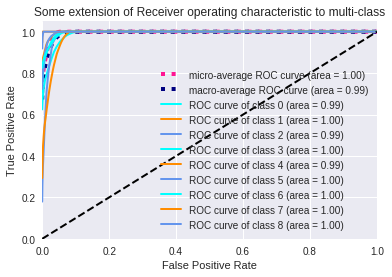

In [29]:
onehot = label_binarize(all_full["Class"], classes=range(1, 10))
helpers.plot_roc_curve(onehot, perfect_pred)
